In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[148.5  143.5  150.5 ]
   [139.25 134.25 141.25]
   [143.5  138.5  145.5 ]
   ...
   [129.75 120.75 125.75]
   [113.   104.   109.  ]
   [113.75 104.75 109.75]]

  [[133.75 128.75 135.75]
   [144.75 139.75 146.75]
   [142.5  137.5  144.5 ]
   ...
   [114.5  105.5  110.5 ]
   [117.5  108.5  113.5 ]
   [139.5  130.5  135.5 ]]

  [[131.75 126.75 133.75]
   [143.25 138.25 145.25]
   [154.75 149.75 156.75]
   ...
   [129.75 120.75 125.75]
   [128.5  119.5  124.5 ]
   [123.   114.   119.  ]]

  ...

  [[180.25 175.25 179.25]
   [179.75 174.75 178.75]
   [166.75 161.75 165.75]
   ...
   [128.   119.   122.  ]
   [131.25 122.25 125.25]
   [131.75 122.75 125.75]]

  [[178.5  173.5  177.5 ]
   [175.75 170.75 174.75]
   [156.5  151.5  155.5 ]
   ...
   [128.25 119.25 122.25]
   [134.25 125.25 128.25]
   [126.25 117.25 120.25]]

  [[182.5  177.5  181.5 ]
   [191.   186.   190.  ]
   [194.   189.   193.  ]
   ...
   [131.   122.   125.  ]
   [141.75 132.75 135.75]
   [124.25 115.25 11

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout
from tensorflow.keras.models import Sequential


In [8]:
model = Sequential()

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,Dropout


In [11]:
# Add Convolutional Layers
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
# Add Convolutional Layers
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
# Add Convolutional Layers
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
# Add Convolutional Layers
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,  padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
# Add Convolutional Layers
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:

# Add Dropout Layer
model.add(Dropout(0.25))

In [17]:
# Flatten the output
model.add(Flatten())

In [18]:
model.add(Dense(units=1500, activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
num_classes = len(training_set.class_names)

In [21]:
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,713,826 (33.24 MB)

 Trainable params: 8,713,826 (33.24 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
),loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
##compiling model


In [ ]:
##model training


In [24]:
training_history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1592s 721ms/step - accuracy: 0.2834 - loss: 2.5655 - val_accuracy: 0.7851 - val_loss: 0.6783
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1491s 678ms/step - accuracy: 0.8014 - loss: 0.6319 - val_accuracy: 0.8756 - val_loss: 0.3832
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1526s 694ms/step - accuracy: 0.8864 - loss: 0.3569 - val_accuracy: 0.9076 - val_loss: 0.2950
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1558s 709ms/step - accuracy: 0.9210 - loss: 0.2396 - val_accuracy: 0.9321 - val_loss: 0.2108
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2357s 1s/step - accuracy: 0.9435 - loss: 0.1751 - val_accuracy: 0.9331 - val_loss: 0.2062
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1270s 578ms/step - accuracy: 0.9555 - loss: 0.1358 - val_accuracy: 0.9492 - val_loss: 0.1551
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1839s 837ms/step - accuracy: 0.9646 - loss: 0.1086 - val_accuracy: 0.9476 - val_loss: 0.1789
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1985s 903ms/step

In [25]:
train_loss,train_acc =model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 450s 205ms/step - accuracy: 0.9825 - loss: 0.0562


In [26]:
print(train_loss,train_acc)

0.049984630197286606 0.9844796657562256


In [27]:
#model on validation set
train_loss,train_acc =model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 86s 156ms/step - accuracy: 0.9511 - loss: 0.1656


In [28]:
model.save("trained_model.h5")

In [29]:
model.save("trained_model.keras")


In [30]:
if 'training_history' in globals():
    # Variable is defined, proceed with using it
    training_history.history
else:
    # Variable is not defined, handle the error
    print("Error: Variable 'training_history' is not defined.")

In [31]:
#recording history in json
import json
with open('history.json', 'w') as f:
    json.dump(training_history.history, f)

In [36]:

print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [32]:
training_history.history['val_accuracy']

[0.7851126790046692,
 0.8755975365638733,
 0.9075802564620972,
 0.9321079254150391,
 0.9330753684043884,
 0.949180543422699,
 0.9475870728492737,
 0.95083087682724,
 0.95652174949646,
 0.9524242877960205]

In [ ]:
### Accuracy Visulazation

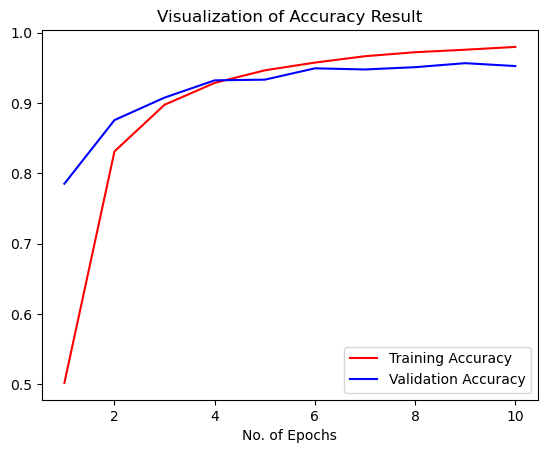

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [38]:
class_name = validation_set.class_names


In [54]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 285s 16ms/step


(array([[9.9999821e-01, 3.2211201e-08, 3.6787694e-11, ..., 1.1680522e-13,
         1.2537211e-12, 7.8943949e-11],
        [9.9999964e-01, 5.2282616e-08, 1.7583076e-11, ..., 7.5986098e-15,
         2.6985036e-13, 1.2851350e-11],
        [1.0000000e+00, 1.0237438e-11, 1.4600769e-14, ..., 3.3192409e-18,
         3.9840274e-16, 6.1512935e-14],
        ...,
        [2.3370518e-08, 5.3269104e-12, 4.4041329e-07, ..., 1.2402665e-12,
         1.1105746e-08, 9.9999630e-01],
        [8.2834845e-10, 2.3481644e-14, 2.0790715e-08, ..., 1.7597879e-14,
         2.8120686e-10, 9.9999952e-01],
        [5.6191076e-12, 3.0921910e-14, 2.2688941e-10, ..., 2.7992020e-16,
         2.1494851e-11, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [41]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [42]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_true,predicted_categories)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.97      0.94       504
                                 Apple___Black_rot       0.86      0.97      0.91       497
                          Apple___Cedar_apple_rust       0.97      0.95      0.96       440
                                   Apple___healthy       0.94      0.95      0.95       502
                               Blueberry___healthy       0.98      0.93      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [ ]:
## confusion Matrix Visulaization

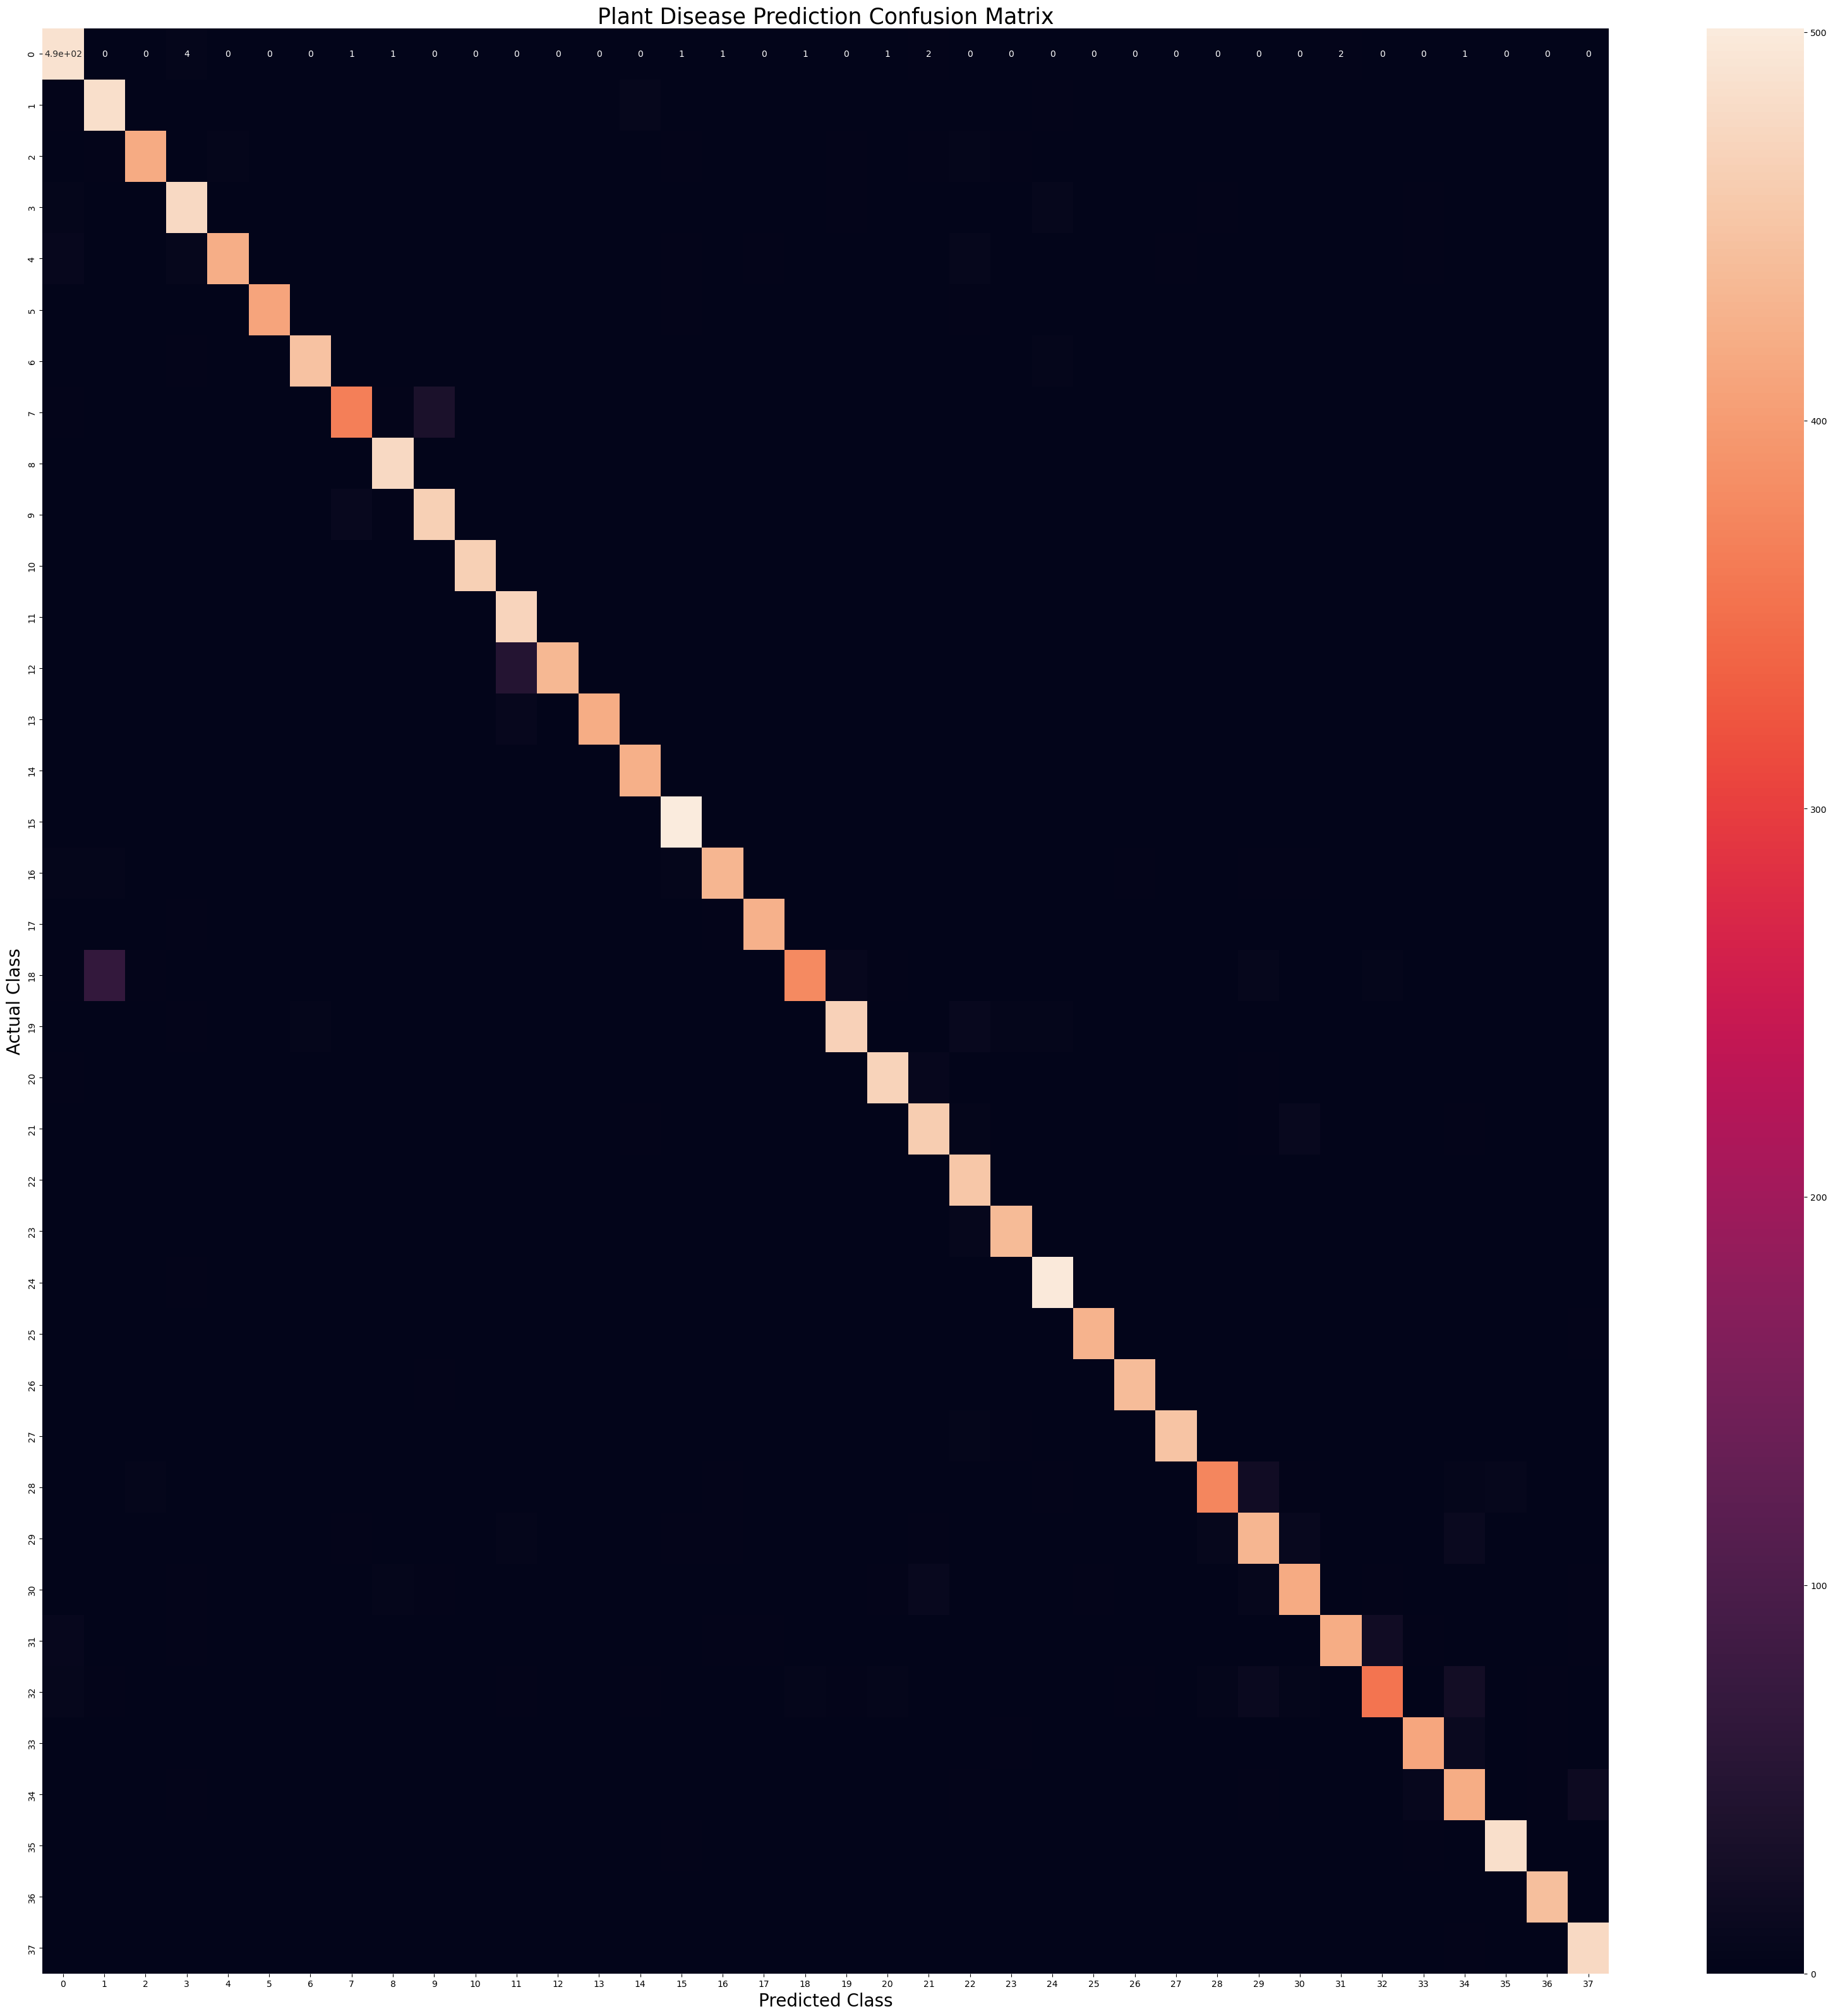

In [53]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()